170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
22
ID: 2405, Original label: 3
ID: 2405, Corrected label: 6


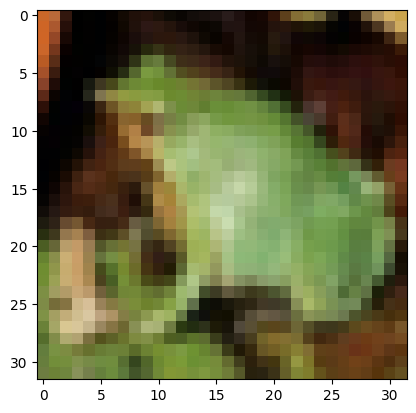

ID: 6877, Original label: 0
ID: 6877, Corrected label: 8


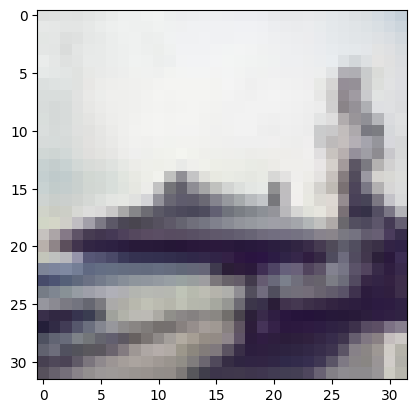

ID: 8058, Original label: 4
ID: 8058, Corrected label: 7


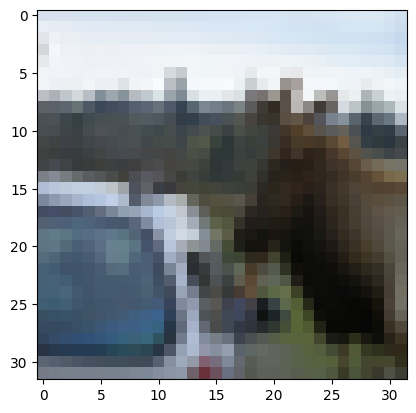

ID: 2532, Original label: 0
ID: 2532, Corrected label: 8


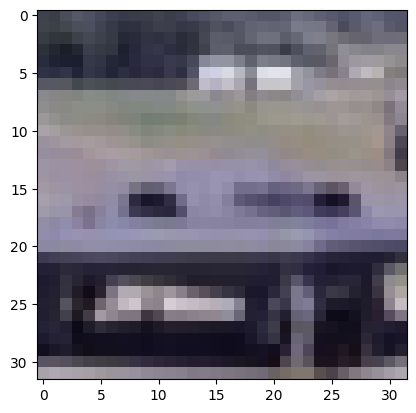

ID: 7657, Original label: 2
ID: 7657, Corrected label: 7


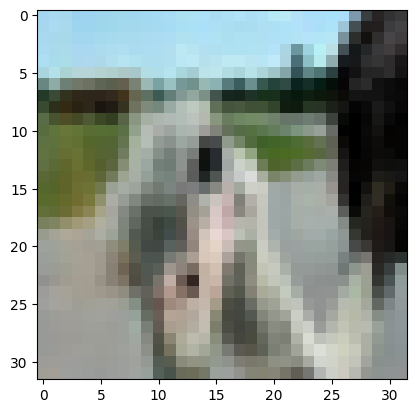

ID: 1969, Original label: 1
ID: 1969, Corrected label: 9


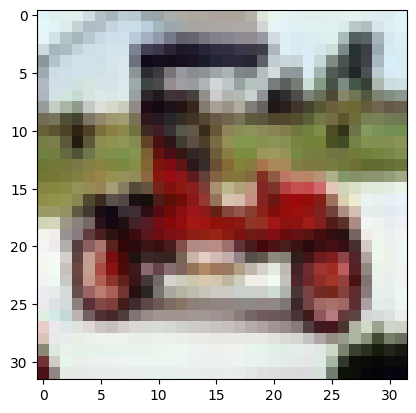

ID: 2804, Original label: 3
ID: 2804, Corrected label: 5


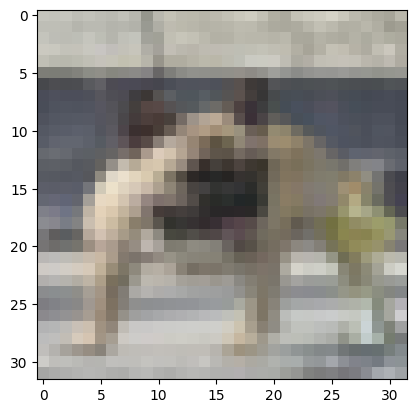

ID: 6792, Original label: 3
ID: 6792, Corrected label: 5


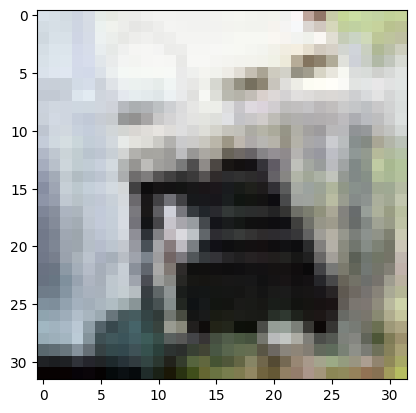

ID: 1227, Original label: 3
ID: 1227, Corrected label: 5


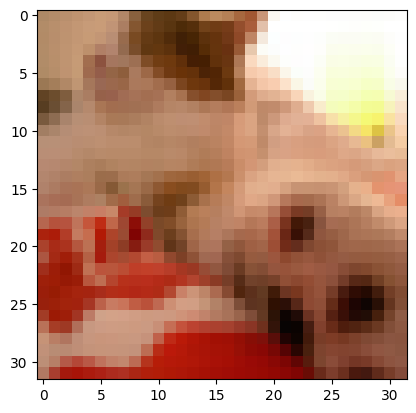

ID: 5191, Original label: 3
ID: 5191, Corrected label: 5


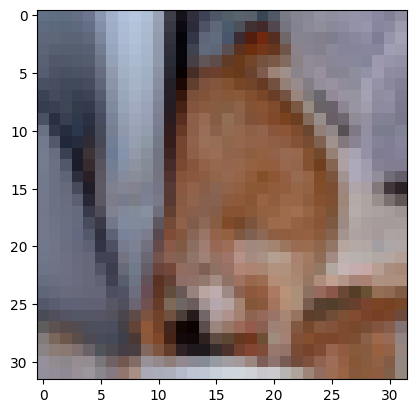

ID: 5690, Original label: 7
ID: 5690, Corrected label: 4


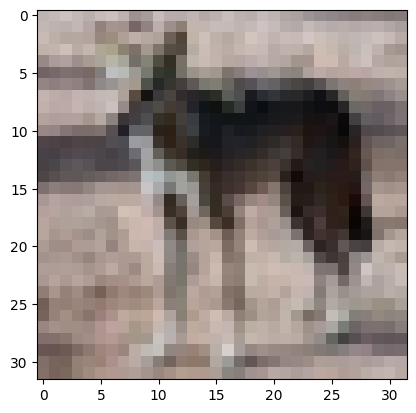

ID: 1718, Original label: 0
ID: 1718, Corrected label: 8


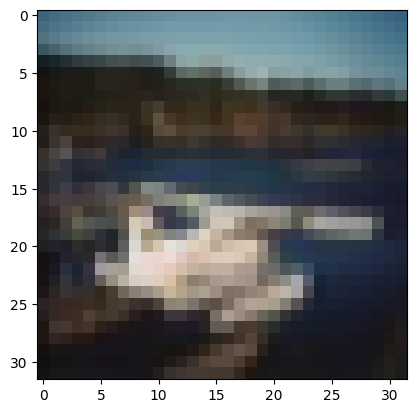

ID: 2592, Original label: 2
ID: 2592, Corrected label: 4


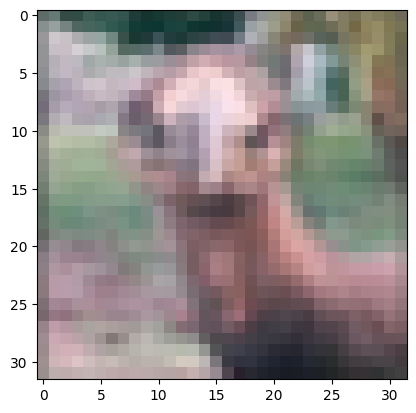

ID: 4794, Original label: 4
ID: 4794, Corrected label: 2


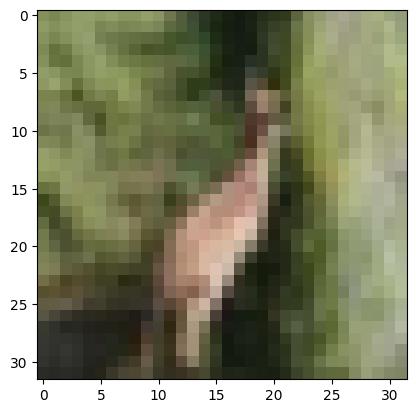

ID: 5960, Original label: 2
ID: 5960, Corrected label: 3


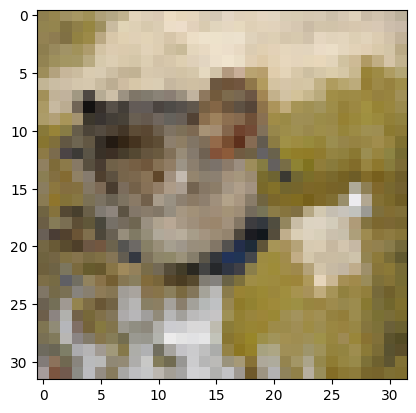

ID: 165, Original label: 4
ID: 165, Corrected label: 2


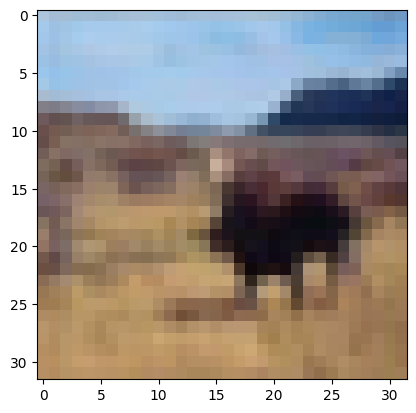

ID: 9227, Original label: 1
ID: 9227, Corrected label: 9


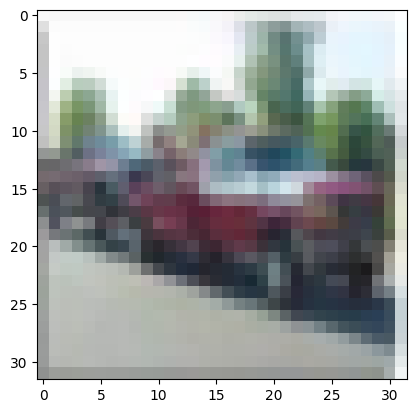

ID: 5632, Original label: 3
ID: 5632, Corrected label: 5


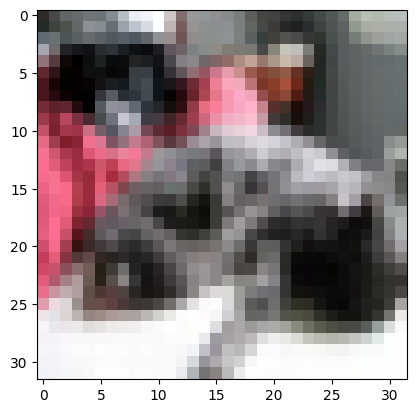

ID: 9352, Original label: 1
ID: 9352, Corrected label: 9


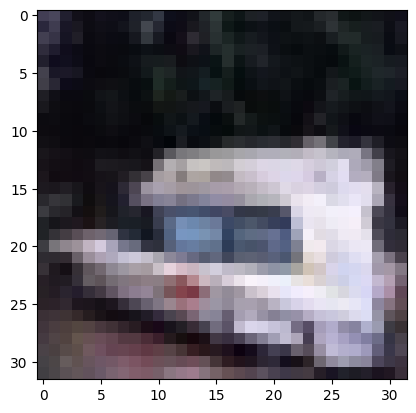

ID: 7846, Original label: 6
ID: 7846, Corrected label: 3


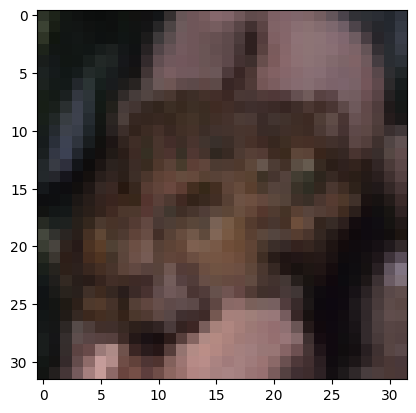

ID: 6966, Original label: 0
ID: 6966, Corrected label: 8


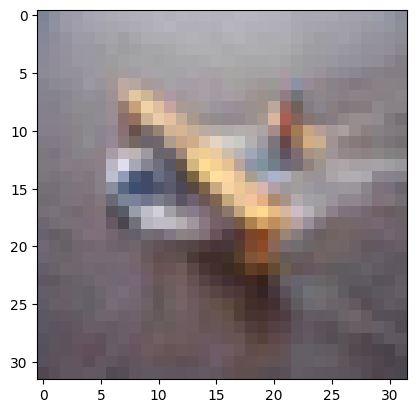

ID: 5468, Original label: 5
ID: 5468, Corrected label: 3


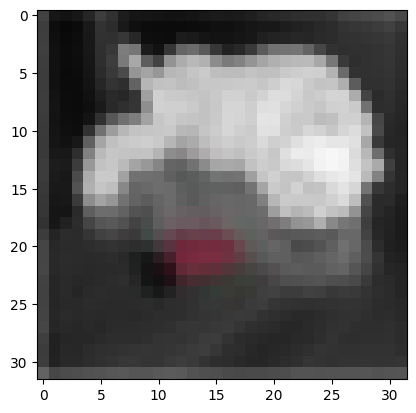

ID: 2405, final label: 6
ID: 6877, final label: 8
ID: 8058, final label: 7
ID: 2532, final label: 8
ID: 7657, final label: 7
ID: 1969, final label: 9
ID: 2804, final label: 5
ID: 6792, final label: 5
ID: 1227, final label: 5
ID: 5191, final label: 5
ID: 5690, final label: 4
ID: 1718, final label: 8
ID: 2592, final label: 4
ID: 4794, final label: 2
ID: 5960, final label: 3
ID: 165, final label: 2
ID: 9227, final label: 9
ID: 5632, final label: 5
ID: 9352, final label: 9
ID: 7846, final label: 3
ID: 6966, final label: 8
ID: 5468, final label: 3


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_test = y_test.flatten()  # 레이블을 1차원 배열로 변환

# 오류 데이터 ID와 수정할 레이블
error_data = {
    2405: 6,  # frog
    6877: 8,  # ship
    8058: 7,  # horse
    2532: 8,  # ship (neither airplane nor automobile)
    7657: 7,  # horse
    1969: 9,  # truck (neither automobile nor truck)
    2804: 5,  # dog
    6792: 5,  # dog (neither cat nor truck)
    1227: 5,  # dog
    5191: 5,  # dog
    5690: 4,  # deer
    1718: 8,  # ship
    2592: 4,  # deer
    4794: 2,  # bird
    5960: 3,  # cat
    165: 2,  # bird (neither deer nor bird)
    9227: 9,  # truck
    5632: 5,  # dog
    9352: 9,  # truck
    7846: 3,  # cat
    6966: 8,  # ship
    5468: 3,  # cat
}

print(len(error_data))

# 오류 데이터 시각화 및 수정
for error_id, correct_label in error_data.items():
    plt.imshow(x_test[error_id])
    print(f"ID: {error_id}, Original label: {y_test[error_id]}")

    # 레이블 수정
    y_test[error_id] = correct_label

    print(f"ID: {error_id}, Corrected label: {y_test[error_id]}")
    plt.show() #수정된 이미지 확인

#수정된 라벨 확인
for error_id, correct_label in error_data.items():
  print(f"ID: {error_id}, final label: {y_test[error_id]}")

In [3]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.AvgPool2D((2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.AvgPool2D((2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

In [4]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [5]:
import keras_tuner as kt

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='tuner_dir',
                     project_name='cifar10_tuning')

tuner.search(x_train, y_train, epochs=3, validation_split=0.2)

Trial 3 Complete [00h 00m 19s]
val_accuracy: 0.5763999819755554

Best val_accuracy So Far: 0.6111999750137329
Total elapsed time: 00h 01m 11s


In [6]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, y_train, epochs=5, validation_split=0.2)
model.save('cifar10_tuned_model.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 15, 15, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3703 - loss: 2.1169 - val_accuracy: 0.4543 - val_loss: 1.5286
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5797 - loss: 1.1826 - val_accuracy: 0.5222 - val_loss: 1.3777
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6428 - loss: 1.0153 - val_accuracy: 0.6122 - val_loss: 1.2059
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6840 - loss: 0.8959 - val_accuracy: 0.6581 - val_loss: 0.9955
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7147 - loss: 0.8113 - val_accuracy: 0.4969 - val_loss: 1.5722


In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('cifar10_tuned_model.tflite', 'wb') as f:
    f.write(tflite_model)

interpreter = tf.lite.Interpreter(model_path='cifar10_tuned_model.tflite')
interpreter.allocate_tensors()

signatures = interpreter.get_signature_list()
print(signatures)

Saved artifact at '/tmp/tmpcalh6ewg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_56')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137298860469776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296596431696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810251792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810248720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810038608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810253904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810249488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810248528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810259856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810251216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137296810260

### tflite test
```python
from flask import Flask, request, jsonify
import tensorflow as tf
import numpy as np

app = Flask(__name__)

# TensorFlow Lite 모델 로드
interpreter = tf.lite.Interpreter(model_path="cifar10_tuned_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_image(image_data):
    # 이미지 전처리 (모델 입력 형태에 맞게 수정)
    image = tf.image.decode_jpeg(image_data, channels=3) # 이미지 디코딩
    image = tf.image.resize(image, (32, 32)) # 이미지 사이즈 조정
    image = tf.cast(image, tf.float32) / 255.0 # 정규화
    image = np.expand_dims(image, axis=0) # 배치 차원 추가
    return image

@app.route('/predict', methods=['POST'])
def predict():
    try:
        image_file = request.files['image']
        image_data = image_file.read()
        image = preprocess_image(image_data)

        # TensorFlow Lite 모델 추론
        interpreter.set_tensor(input_details[0]['index'], image)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])

        # 예측 결과 반환
        prediction = np.argmax(output)
        return jsonify({'prediction': int(prediction)})

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8501)
```

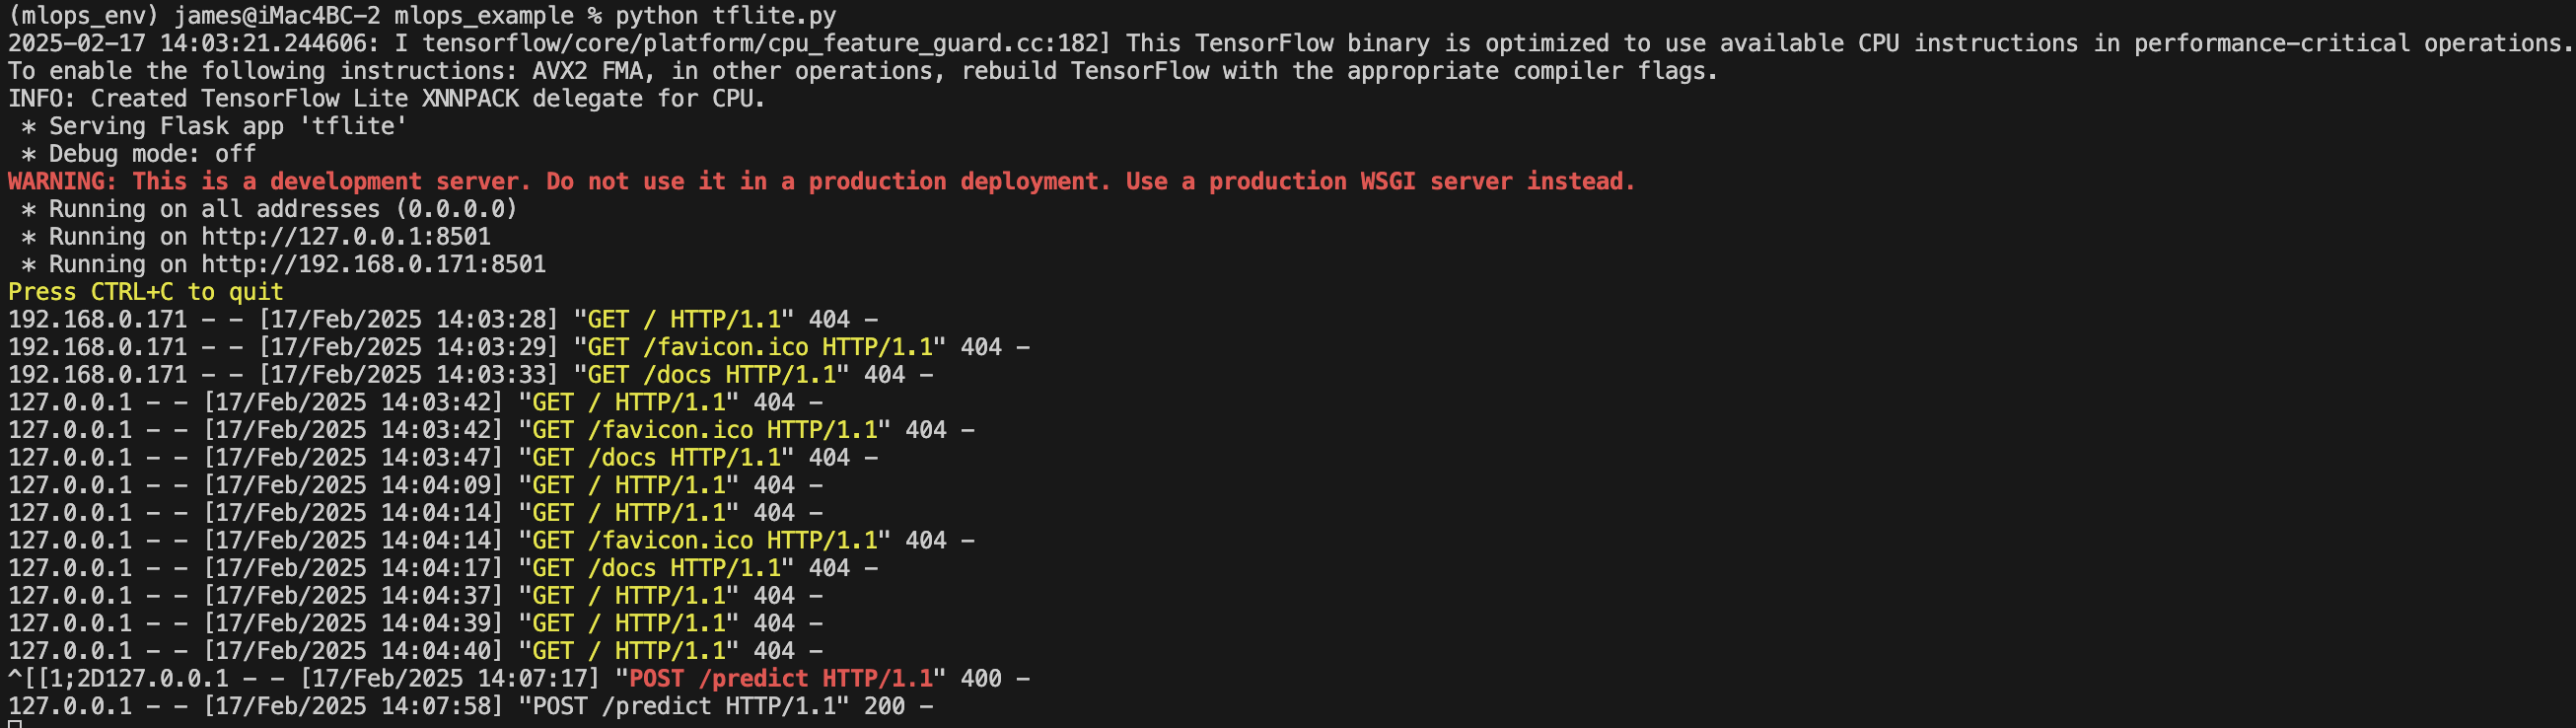

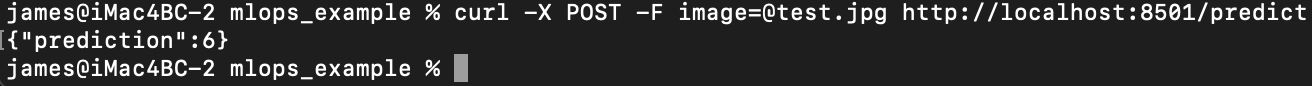

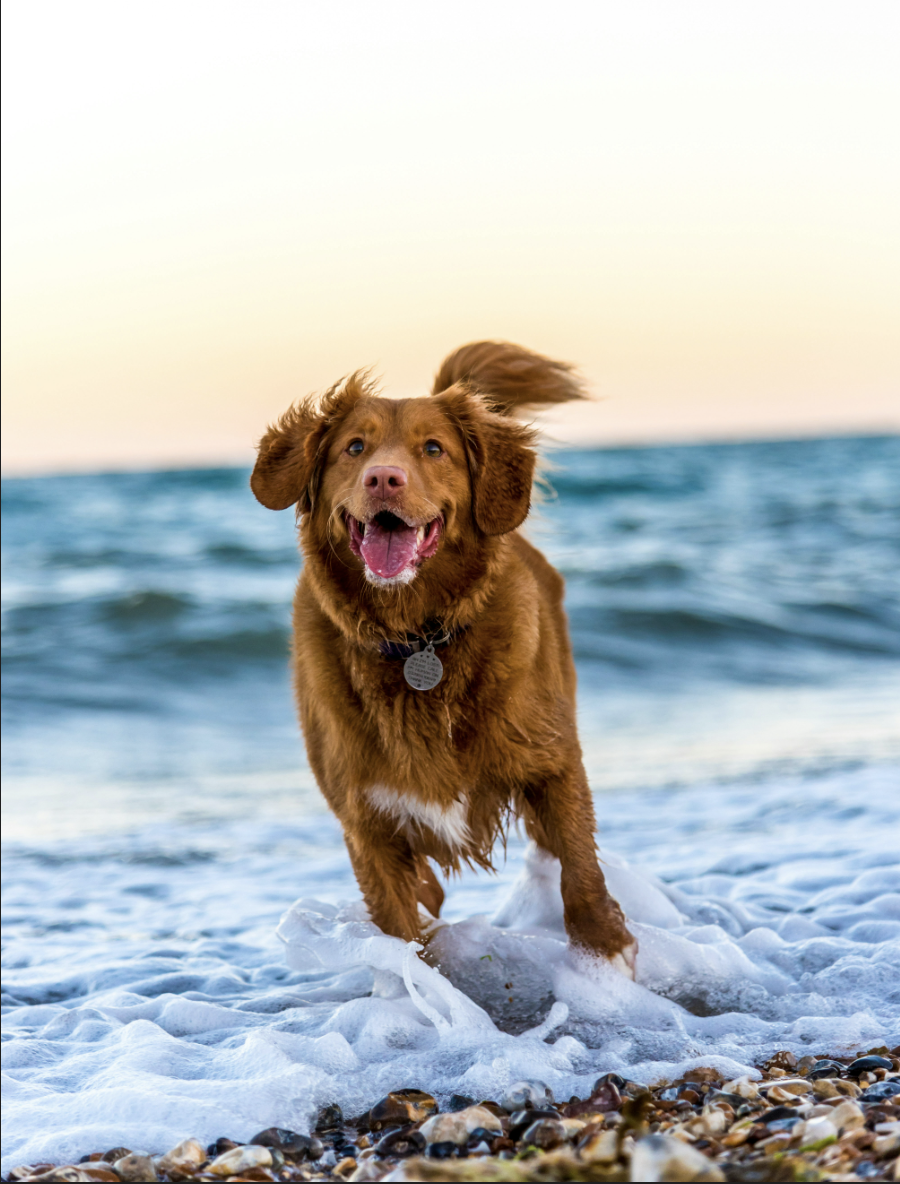


위 강아지 이미지를 6(frog)으로 분류한 결과를 얻을 수 있었다.